<a href="https://colab.research.google.com/github/Nikhil-Patil-Web/MachineLearningTutorials/blob/main/CodeAlongFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Tools

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")
file_path ="/content/drive/My Drive/MachineLearningUdemy/Section2/Data.csv"

Mounted at /content/drive


## Importing the dataset

In [ ]:
dataset = pd.read_csv(file_path)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [ ]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## Taking care of missing data

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [ ]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding categorical data

### Encoding the Independent Variable

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Encoding the Dependent Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


### Splitting the Data into Training Sets and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


### Normilization of Data

In [ ]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train[:,3:]= sc.fit_transform(X_train[:,3:])
X_test[:,3:]= sc.transform(X_test[:,3:])
X_test

array([[0.0, 1.0, 0.0, -1.4661817944830127, -0.9069571034860731],
       [1.0, 0.0, 0.0, -0.44973664397484425, 0.20564033932253029]],
      dtype=object)

# Linear Regression


### Import the libraries

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### Import the datasets

In [ ]:
filepath = "/content/drive/My Drive/MachineLearningUdemy/Section3/SimpleLinear/SimpleLinear/Python/Salary_Data.csv"
df = pd.read_csv(filepath)
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
X=df.drop("Salary", axis=1)
X = X.values
Y=df["Salary"]
Y=Y.values
print(Y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)
print(y_pred_train, y_train)

[122386.880839   107308.77632215  63016.8443039   35687.77986711
  46053.97672244  73383.04115923  52650.64744857  63959.2258362
  63016.8443039   99769.72406372  37572.54293172  39457.30599632
 110135.92091906  44169.21365784  92230.6718053  114847.82858057
  80922.09341766 124271.6439036   89403.52720839  55477.79204548
  62074.4627716   67728.75196542  81864.47494996  53593.02898087] [122391. 109431.  56957.  39343.  39891.  66029.  56642.  57081.  55794.
 101302.  46205.  37731. 105582.  43525.  98273. 116969.  81363. 121872.
  91738.  54445.  63218.  61111.  93940.  60150.]


24 24


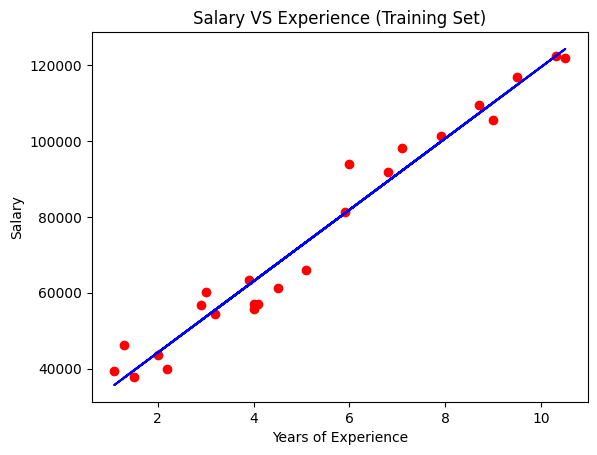

In [ ]:
import matplotlib.pyplot as plt
print(X_train.size, y_train.size)
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train,y_pred_train, color="blue")
plt.title("Salary VS Experience (Training Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

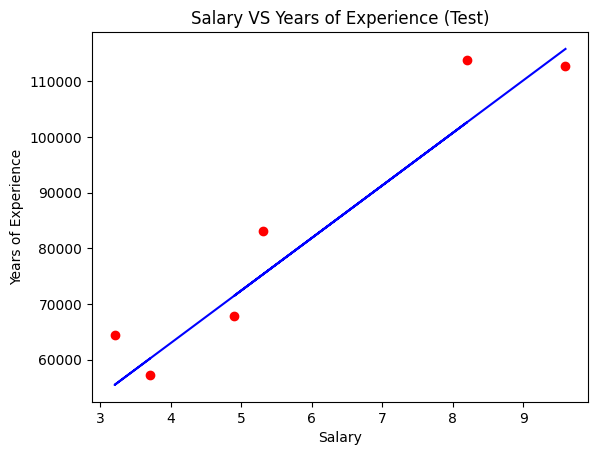

In [ ]:
plt.scatter(X_test, y_test, color="red")
plt.plot(X_test, y_pred, color="blue")
plt.title("Salary VS Years of Experience (Test)")
plt.xlabel("Salary")
plt.ylabel("Years of Experience")
plt.show()

# Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [2]:
filepath = "/content/drive/My Drive/MachineLearningUdemy/Section3/MultipleLinear/MultipleLinear/Python/50_Startups.csv"
df = pd.read_csv(filepath)
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


We will generate our X and y dataframe matrices

In [10]:
X = df.drop("Profit", axis=1)
X= X.values
y= df["Profit"]
y=y.values

Encoding the State file with the help of a one hot encoder

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [3] )], remainder="passthrough")
X= np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

We will split the data in train and test sets

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(40, 6) (10, 6)


Calling and fitting the model to our dataset


In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_train_preds= model.predict(X_train)
y_pred = model.predict(X_test)

Printing the graphical representation of our predictions

In [22]:
np.set_printoptions(precision=2)
print (np.concatenate((y_pred.reshape (len (y_pred),1), y_test.reshape(len (y_test),1)),1))

[[126362.88 134307.35]
 [ 84608.45  81005.76]
 [ 99677.49  99937.59]
 [ 46357.46  64926.08]
 [128750.48 125370.37]
 [ 50912.42  35673.41]
 [109741.35 105733.54]
 [100643.24 107404.34]
 [ 97599.28  97427.84]
 [113097.43 122776.86]]


We will now begin with the Polynomial Regression